## Predictive modelling
## Neural Networks

In [1]:
def data_prep():
   
    df = loadCsv()
    df = convertDataTypes(df)
    df = mapToNumericType(df)
    # one-hot encoding
    df = pd.get_dummies(df)
    
    return df

In [2]:
def loadCsv():
    df = pd.read_csv('Project datasets/D2.csv')
    return df

In [3]:
def convertDataTypes(df):
    # change DemCluster from interval/integer to nominal/str
    df['contacts_count'] = df['contacts_count'].astype('int64')
    df['house_count'] = df['house_count'].astype('int64')
    df['alcohol'] = df['alcohol'].astype('int64')
    return df

In [4]:
#mapping categorical to numeric type
def mapToNumericType(df):

    insurance_map = {'yes':1, 'no': 0}
    df['insurance'] = df['insurance'].map(insurance_map)

    immigrant_map = {'native':0, 'immigrant': 1}
    df['immigrant'] = df['immigrant'].map(immigrant_map)
    
    return df


In [5]:
#data preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = data_prep()
print(df)
# target/input split
y = df['covid19_positive']
X = df.drop(['covid19_positive'], axis=1)

X_mat = X.to_numpy()

# setting random state
rs = 10

#splitting
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

#scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)


      height  weight  insurance  immigrant  alcohol  contacts_count  \
0        174      64          1          0        3               7   
1        182     118          1          0        0               7   
2        184     118          1          0        0               7   
3        164      72          1          0       14               7   
4        192      92          1          0        0               7   
...      ...     ...        ...        ...      ...             ...   
6105     174      72          1          0        3               5   
6106     164     130          0          0        3              21   
6107     162      56          1          0        0              10   
6108     158      70          1          1        3              14   
6109     170      86          1          0        0              11   

      house_count  worried  covid19_positive  gender_female  ...  \
0               2        4                 1              0  ...   
1          

## Build a Neural Network model using the default setting

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

model_1 = MLPClassifier(random_state=rs)
model_1.fit(X_train, y_train)

print("Train accuracy:", model_1.score(X_train, y_train))
print("Test accuracy:", model_1.score(X_test, y_test))

y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_1)

Train accuracy: 0.9427168576104746
Test accuracy: 0.696126568466994
              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1070
           1       0.64      0.60      0.62       763

    accuracy                           0.70      1833
   macro avg       0.69      0.68      0.68      1833
weighted avg       0.69      0.70      0.69      1833

MLPClassifier(random_state=10)


/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [7]:
#get default params
default_params = model_1.get_params()
default_params

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

The built neural network with default parameters shows a high accuracy on the training dataset but, the test accuracy is comparatively much lower (69%), leading to overfitting to the training data. and we can see the convergence warning given as well.When this warining message is there, the max_iter hyperparameter of the neural network need to be increased to converge the training and test data.

So we tried max_iter with 800 to check for convergence.

In [8]:
model_2 = MLPClassifier(max_iter=800, random_state=rs)
model_2.fit(X_train, y_train)

print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))

y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_2)

Train accuracy: 0.9988309562777647
Test accuracy: 0.6781232951445717
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1070
           1       0.62      0.59      0.60       763

    accuracy                           0.68      1833
   macro avg       0.67      0.67      0.67      1833
weighted avg       0.68      0.68      0.68      1833

MLPClassifier(max_iter=800, random_state=10)


After setting the iteration of 800 max_iter in the neural network, it performed with much higher accuracy on the training dataset (99%). However, the test accuracy has decreased to 67%. So, we can clearly see an overfitting scenario here. 

In [9]:
#get default params
default_params = model_2.get_params()
default_params

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 800,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [10]:
print(X_train.shape)

(4277, 54)


## Finding optimal hyperparameter with GridSearchCV

GridSearchCV was used to get the optimal hyperparameters. In our neural network-built model, we tried to tune the model using two parameters ‘hidden_layer_sizes’ and ‘alpha’.   

**Check for optimal hidden_layer_sizes**

In [11]:
#With 54 features, we will start tuning with one hidden layer of 5 to 54 neurons, increment of 10. This might take a bit of time.
from sklearn.model_selection import GridSearchCV

params = {'hidden_layer_sizes': [(x,) for x in range(5, 55, 10)]}

cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(X_train, y_train)




/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=10), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(5,), (15,), (25,), (35,),
                                                (45,)]},
             return_train_score=True)

In [12]:
result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([0.74658191, 0.90596957, 1.05709238, 1.22386065, 1.26387396]), 'std_fit_time': array([0.03522025, 0.02641532, 0.03629397, 0.02379745, 0.16074308]), 'mean_score_time': array([0.00035074, 0.00040872, 0.00041342, 0.00040083, 0.00037482]), 'std_score_time': array([0.00013186, 0.00018633, 0.00018622, 0.0001735 , 0.00014488]), 'param_hidden_layer_sizes': masked_array(data=[(5,), (15,), (25,), (35,), (45,)],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'hidden_layer_sizes': (5,)}, {'hidden_layer_sizes': (15,)}, {'hidden_layer_sizes': (25,)}, {'hidden_layer_sizes': (35,)}, {'hidden_layer_sizes': (45,)}], 'split0_test_score': array([0.71028037, 0.70093458, 0.6728972 , 0.6635514 , 0.68925234]), 'split1_test_score': array([0.70794393, 0.67056075, 0.68224299, 0.6635514 , 0.67056075]), 'split2_test_score': array([0.70093458, 0.67056075, 0.69626168, 0.66121495, 0.68457944]), 'split3_test_score': array([0.

Total number of models:  5


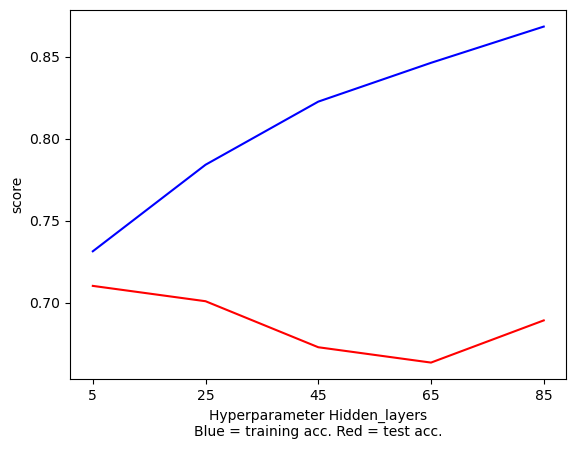

In [13]:
#find the optimal parameters by visualizing the convergence effect on traing and test data for the first split 
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(5, 86, 20))
plt.ylabel('score')
plt.show()

Total number of models:  5


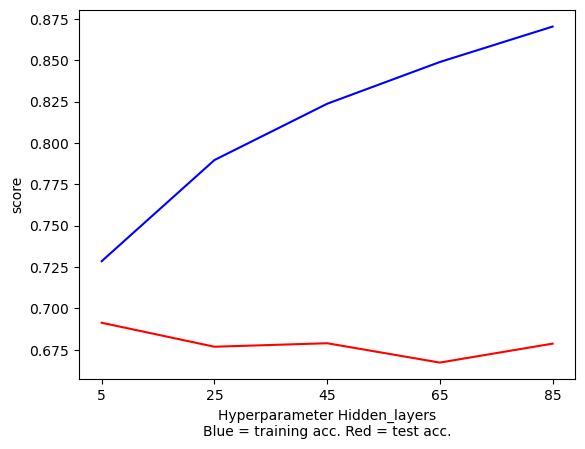

In [14]:
### find the optimal parameters by visualizing the convergence effect on traing and test data for the mean_train_score split 
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(5, 86, 20))
plt.ylabel('score')
plt.show()

In [15]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_1.best_params_)

Train accuracy: 0.7259761515080664
Test accuracy: 0.6950354609929078
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1070
           1       0.66      0.55      0.60       763

    accuracy                           0.70      1833
   macro avg       0.69      0.67      0.68      1833
weighted avg       0.69      0.70      0.69      1833

{'hidden_layer_sizes': (5,)}


In [16]:
# new parameters
params = {'hidden_layer_sizes': [(1), (2), (3,), (5,), (7,), (9,)]}

cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)

print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)

/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train accuracy: 0.7093757306523264
Test accuracy: 0.7004909983633388
              precision    recall  f1-score   support

           0       0.71      0.83      0.76      1070
           1       0.69      0.51      0.59       763

    accuracy                           0.70      1833
   macro avg       0.70      0.67      0.68      1833
weighted avg       0.70      0.70      0.69      1833

{'hidden_layer_sizes': 1}


/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
# to overcome the convergence warning setting the max_iter paramter and rerun for hidden_layer_sizes
params = {'hidden_layer_sizes': [(2), (3,), (5,), (7,), (9,)]}

cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs,max_iter=700), cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)

print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)


Train accuracy: 0.7044657470189385
Test accuracy: 0.6966721222040371
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      1070
           1       0.68      0.51      0.58       763

    accuracy                           0.70      1833
   macro avg       0.69      0.67      0.67      1833
weighted avg       0.69      0.70      0.69      1833

{'hidden_layer_sizes': 2}


In [18]:
# to overcome the convergence warning setting the max_iter paramter and rerun for hidden_layer_sizes
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)]}

cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs,max_iter=700), cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)

print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)


Train accuracy: 0.7278466214636428
Test accuracy: 0.6955810147299509
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1070
           1       0.66      0.55      0.60       763

    accuracy                           0.70      1833
   macro avg       0.69      0.67      0.68      1833
weighted avg       0.69      0.70      0.69      1833

{'hidden_layer_sizes': (5,)}


In [19]:
# to overcome the convergence warning setting the max_iter paramter and rerun for hidden_layer_sizes
params = {'hidden_layer_sizes': [(1), (2), (3,), (5,), (7,), (9,)]}

cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs,max_iter=700), cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)

print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)


Train accuracy: 0.7056347907411737
Test accuracy: 0.7043098745226405
              precision    recall  f1-score   support

           0       0.71      0.83      0.77      1070
           1       0.69      0.53      0.60       763

    accuracy                           0.70      1833
   macro avg       0.70      0.68      0.68      1833
weighted avg       0.70      0.70      0.70      1833

{'hidden_layer_sizes': 1}


The output of this GridSearchCV returns 1 neurons as the optimal number of neurons in the hidden layer with an improved train accuracy of 70.5% and test accuracy of 70.4%. Both has similar accuracies and overfitting issue cannot see as with neurons 2 and 3. So 'hidden_layer_sizes': 1 is the optimal number of neurons that the hidden layer can have.

**Tune alpha parameter** 

tune the alpha hyperparameter, which is the learning rate for the gradient descent algorithm. Larger alpha means the gradient descent will take "larger" steps and train faster, but it might miss the optimal solution. Smaller alpha results in "smaller" steps, a slower training speed yet it might stuck at the local minimum.

The default value for alpha is 0.0001, thus we tried alpha values around this number.

In [20]:
params = {'hidden_layer_sizes': [(1), (2), (3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_3 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs,max_iter=700), cv=10, n_jobs=-1)
cv_3.fit(X_train, y_train)

print("Train accuracy:", cv_3.score(X_train, y_train))
print("Test accuracy:", cv_3.score(X_test, y_test))

y_pred = cv_3.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_3.best_params_)

Train accuracy: 0.7056347907411737
Test accuracy: 0.7043098745226405
              precision    recall  f1-score   support

           0       0.71      0.83      0.77      1070
           1       0.69      0.53      0.60       763

    accuracy                           0.70      1833
   macro avg       0.70      0.68      0.68      1833
weighted avg       0.70      0.70      0.70      1833

{'alpha': 0.01, 'hidden_layer_sizes': 1}


The GridSearch returned a hidden layer of 1 neurons and alpha value of 0.01 as the optimal hyperparameters. This cv_3 model and the previous cv_2 both the model gives the same accuracies for both train and test at the max_iter of 700.

## Dimensionality reduction

There are two ways. 
1. Recursive Feature Elimination
2. Selecting using decision tree

**Trying the method of Selecting using decision tree**

In [21]:
import pickle
with open('DecisionTree.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)

print(dt_best.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20}


In [22]:
def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    for i in indices:
        print(feature_names[i], ':', importances[i])


In [23]:
analyse_feature_importance(dt_best.best_estimator_, X.columns)

income_high : 0.30626247035633675
worried : 0.15615780835126597
weight : 0.10453414789573583
contacts_count : 0.08342891214858107
house_count : 0.05314041694702182
height : 0.0330969471201622
alcohol : 0.03158501679579123
insurance : 0.02419288841685868
age_60_70 : 0.021633502838132396
age_70_80 : 0.021462601188936448
income_med : 0.019686218227148635
race_white : 0.019451380810982
immigrant : 0.01844413206232241
working_home : 0.016725639111378338
blood_type_ap : 0.01343246591749301
age_40_50 : 0.01296604329426314
blood_type_unknown : 0.01229621871837209
working_travel non critical : 0.010270391815597255
smoking_never : 0.007809665252126233
gender_male : 0.00711985760566741


In [24]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(4277, 12)


In [48]:
#get selected features
feature_idx = selectmodel.get_support()
feature_name = X.columns[feature_idx]
feature_name

Index(['height', 'weight', 'insurance', 'alcohol', 'contacts_count',
       'house_count', 'worried', 'age_60_70', 'age_70_80', 'income_high',
       'income_med', 'race_white'],
      dtype='object')

The decision tree model identfies the set of 12 variables as important features. Proceed to tune a MLPClassifier with this modified dataset.

In [31]:
params = {'hidden_layer_sizes': [(1,), (2,), (3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train accuracy: 0.7210661678746785
Test accuracy: 0.7168576104746317
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1070
           1       0.69      0.58      0.63       763

    accuracy                           0.72      1833
   macro avg       0.71      0.70      0.70      1833
weighted avg       0.71      0.72      0.71      1833

{'alpha': 0.01, 'hidden_layer_sizes': (7,)}


/Users/nishadianjalika/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
params = {'hidden_layer_sizes': [(1,), (2,), (3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs,max_iter=400), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

Train accuracy: 0.7283142389525368
Test accuracy: 0.7174031642116748
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1070
           1       0.68      0.60      0.64       763

    accuracy                           0.72      1833
   macro avg       0.71      0.70      0.70      1833
weighted avg       0.71      0.72      0.71      1833

{'alpha': 0.001, 'hidden_layer_sizes': (9,)}


The Neural Network model (cv_sel_model) trained with decision tree selected variables has managed to improve model performance with a alpha value of 0.001, hidden_layer_sizes = 9 and max_iter = 400.

## Comparing the models to find the best performing model

1. Default neural network (model_1) 2. Neural network with relu (model_2) 3. Neural network + grid search (cv_1) 4. Neural network + grid search (cv_2) 5. Neural network + grid search (cv_3) 6. Neural network + feature selection using DT + grid search (cv_sel_model)

**ROC curve**

In [49]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_1 = model_1.predict_proba(X_test)
y_pred_proba_nn_2 = model_2.predict_proba(X_test)
y_pred_proba_cv_1 = cv_1.predict_proba(X_test)
y_pred_proba_cv_2 = cv_2.predict_proba(X_test)
y_pred_proba_cv_3 = cv_3.predict_proba(X_test)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)


roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_nn_2 = roc_auc_score(y_test, y_pred_proba_nn_2[:, 1])
roc_index_cv_1 = roc_auc_score(y_test, y_pred_proba_cv_1[:, 1])
roc_index_cv_2 = roc_auc_score(y_test, y_pred_proba_cv_2[:, 1])
roc_index_cv_3 = roc_auc_score(y_test, y_pred_proba_cv_3[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])


print("ROC index on test for NN_default:", roc_index_nn_1)
print("ROC index on test for NN with relu:", roc_index_nn_2)
print("ROC index on test for NN with gridsearch 1:", roc_index_cv_1)
print("ROC index on test for NN with gridsearch 2:", roc_index_cv_2)
print("ROC index on test for NN with gridsearch 3:", roc_index_cv_3)
print("ROC index on test for NN with feature selection (model selection) and gridsearch:", roc_index_cv_sel_model)

from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_nn_2, tpr_nn_2, thresholds_nn_2 = roc_curve(y_test, y_pred_proba_nn_2[:,1])
fpr_cv_1, tpr_cv_1, thresholds_cv_1 = roc_curve(y_test, y_pred_proba_cv_1[:,1])
fpr_cv_2, tpr_cv_2, thresholds_cv_2 = roc_curve(y_test, y_pred_proba_cv_2[:,1])
fpr_cv_3, tpr_cv_3, thresholds_cv_3 = roc_curve(y_test, y_pred_proba_cv_3[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

ROC index on test for NN_default: 0.7301331438860377
ROC index on test for NN with relu: 0.7082679046067539
ROC index on test for NN with gridsearch 1: 0.7501482098455432
ROC index on test for NN with gridsearch 2: 0.723313041241533
ROC index on test for NN with gridsearch 3: 0.7227434744797344
ROC index on test for NN with feature selection (model selection) and gridsearch: 0.7552430763954386


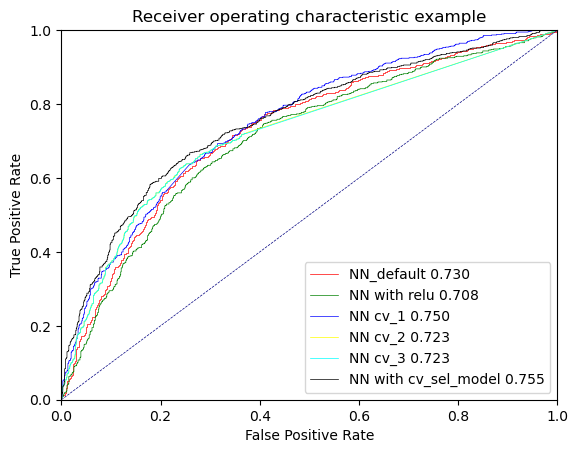

In [50]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_nn_2, tpr_nn_2, label='NN with relu {:.3f}'.format(roc_index_nn_2), color='green', lw=0.5)
plt.plot(fpr_cv_1, tpr_cv_1, label='NN cv_1 {:.3f}'.format(roc_index_cv_1), color='blue', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN cv_2 {:.3f}'.format(roc_index_cv_2), color='yellow', lw=0.5)
plt.plot(fpr_cv_3, tpr_cv_3, label='NN cv_3 {:.3f}'.format(roc_index_cv_3), color='cyan', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='black', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Based on the ROC curve, the neural network model with decision tree selected features, with the ROC index of 0.755, performs marginally better than other models.

## Find the best model from DT, LT and NN

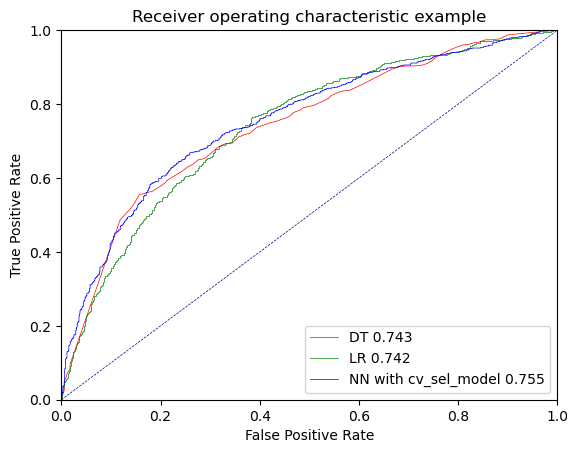

In [51]:
### Enter your code
import pickle
with open('DecisionTree.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
with open('LR.pickle', 'rb') as f:
    lr_best,roc_index_lr_cv, fpr_lr_cv, tpr_lr_cv = pickle.load(f)   
    

plt.plot(fpr_dt_cv, tpr_dt_cv, label='DT {:.3f}'.format(roc_index_dt_cv), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='LR {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 